In [454]:
import seaborn as sns
from sklearn.datasets import make_blobs
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

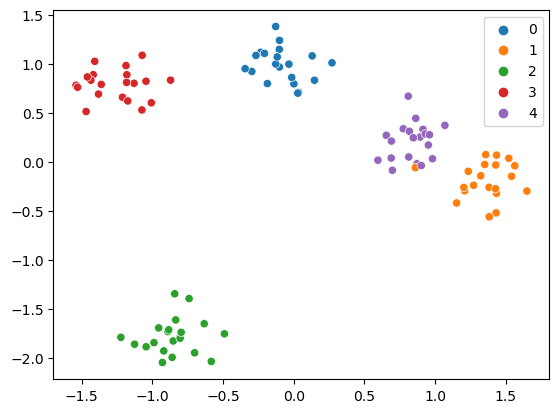

In [455]:
centros = 5;
X_train, cats = make_blobs(n_samples = 100, centers = centros, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=cats, palette='tab10')
plt.show()

In [456]:
def euclid(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [462]:
class KMeans:
    def __init__(self, k, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.variancia_total = 0;
        self.melhores_centroides = None

    def fit(self, X_train, show=False):
        min, max = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroides = X_train[np.random.choice(range(len(X_train)), self.k)]
        
        prev_centroides = None

        iter = 0

        

        while np.not_equal(self.centroides, prev_centroides).any() and iter < self.max_iter:
            pontos_agrupados = [[] for _ in range(self.k)]

            for ponto in X_train:
                dists = euclid(ponto, self.centroides)
                centroide_proximo = np.argmin(dists)
                pontos_agrupados[centroide_proximo].append(ponto)

            prev_centroides = self.centroides
            self.centroides = [np.mean(cluster, axis=0) for cluster in pontos_agrupados]

            for i, centroide in enumerate(self.centroides):
                if np.isnan(centroide).any():
                    self.centroides[i] = prev_centroides[i]

            

            iter += 1

            
            if show:
                classe_centroides, classificacao = kmeans.evaluate(X_train)
                sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
                plt.plot([x for x, _ in kmeans.centroides], [y for _, y in kmeans.centroides], '+', markersize=10)
                plt.title("iter: " + str(iter) + ", var: " + str(self.variancia_total))
                plt.show()
       

            

    def evaluate(self, X):
        centroides = []
        centroide_ids = []
        variancias = [0 for _ in range(self.k)]
        elementos_por_classe = [-1 for _ in range(self.k)]
        for ponto in X:
            dists = euclid(ponto, self.centroides)
            centroide_id = np.argmin(dists)
            
            squared_distance = np.sum((ponto - self.centroides[centroide_id]) ** 2)
            variancias[centroide_id] += squared_distance
            
            elementos_por_classe[centroide_id] += 1
            
            centroides.append(self.centroides[centroide_id])
            centroide_ids.append(centroide_id)

        self.variancia_total = 0;
        
        for i in range(self.k):
            
            variancias[i] /= elementos_por_classe[i]
            self.variancia_total += variancias[i]

        return centroides, centroide_ids

    def best(self, X_train, show=False):
        centroides=[]
        variancias_totais=[]
        self.melhores_centroides = None
        self.melhor_variancia = float("inf")
        
        for i in range(10):
            
            kmeans.fit(X_train)
            centroides.append(kmeans.centroides)
            variancias_totais.append(kmeans.variancia_total)
            if show:
                classe_centroides, classificacao = kmeans.evaluate(X_train)
                sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
                plt.plot([x for x, _ in kmeans.centroides], [y for _, y in kmeans.centroides], '+', markersize=10)
                plt.title("iter: " + str(i) + ", var: " + str(variancias_totais[i]))
                plt.show()
        
            if(variancias_totais[i] < self.melhor_variancia):
                self.melhor_variancia = variancias_totais[i]
                self.melhores_centroides = centroides[i]
                

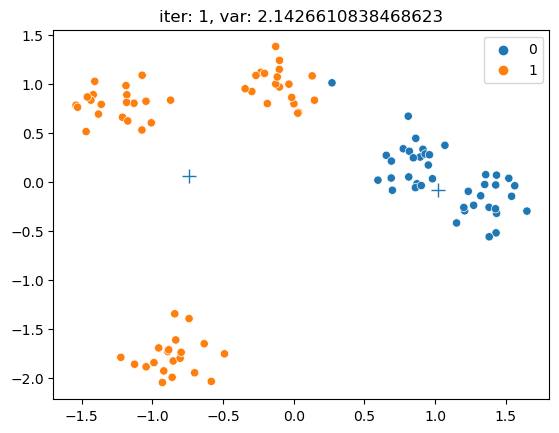

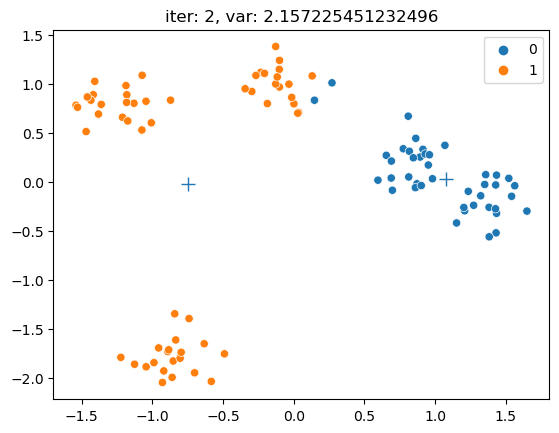

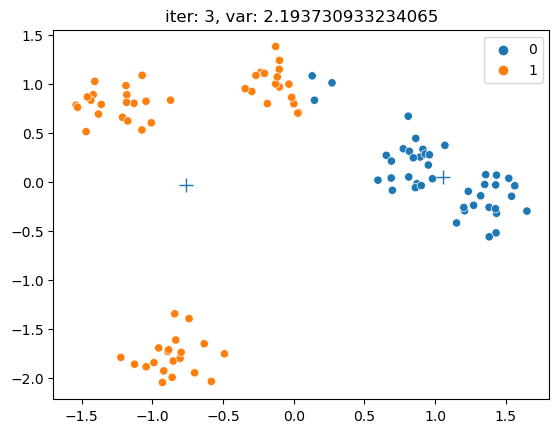

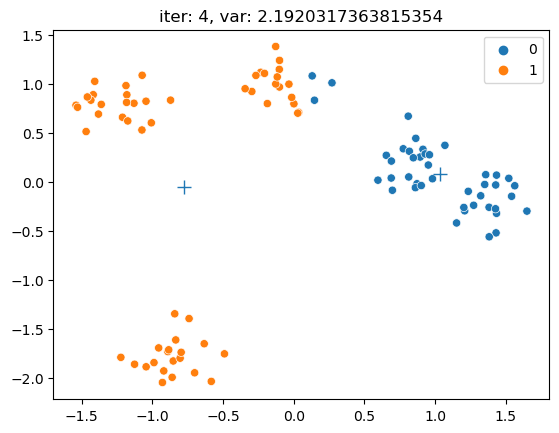

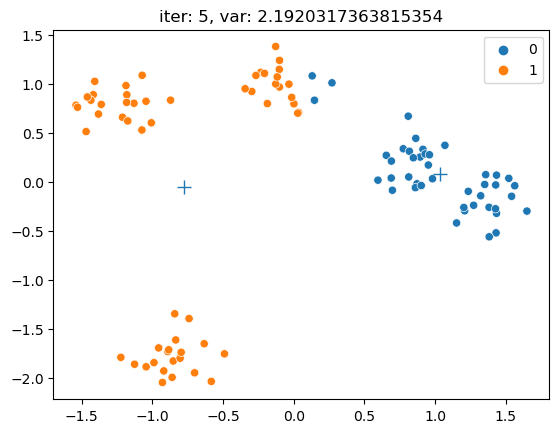

In [463]:
kmeans = KMeans(k=2)
kmeans.fit(X_train, show=True)


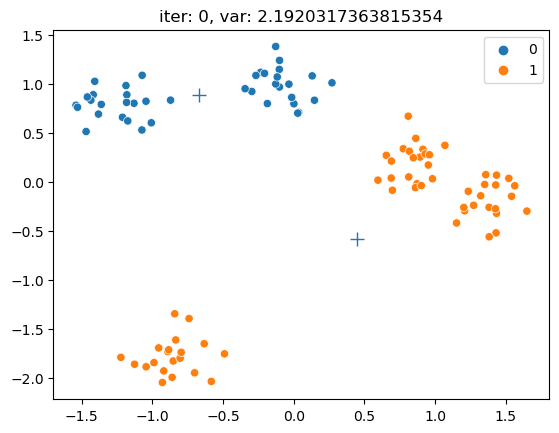

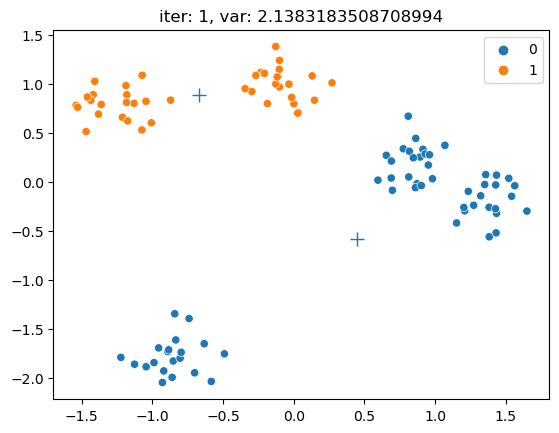

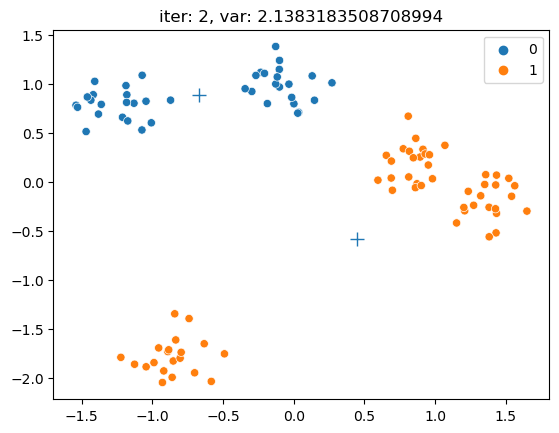

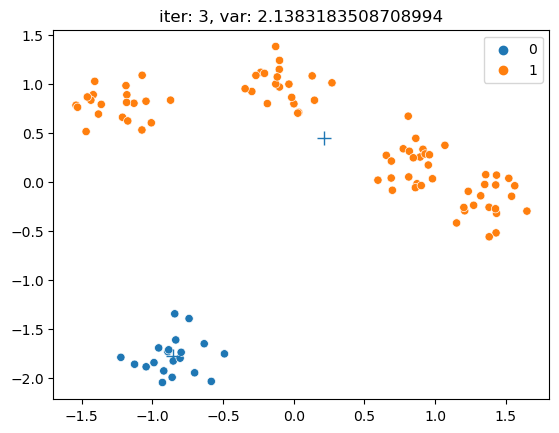

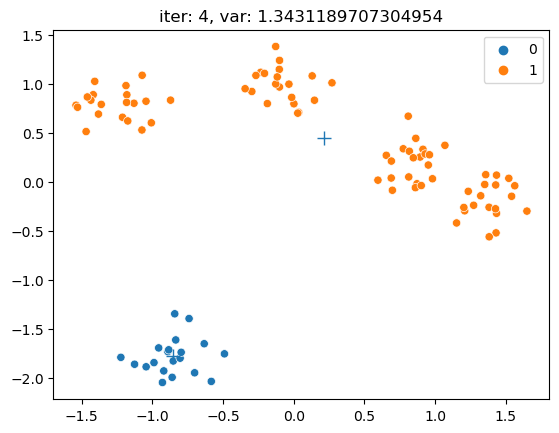

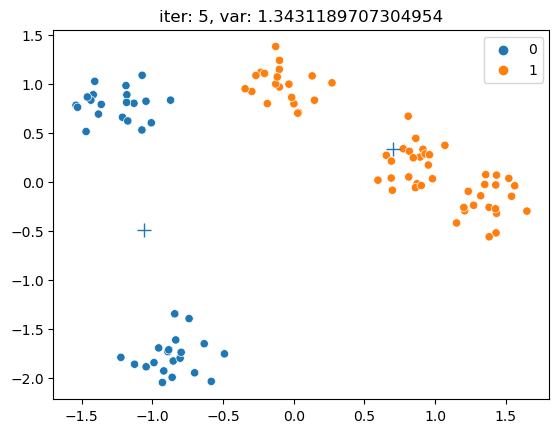

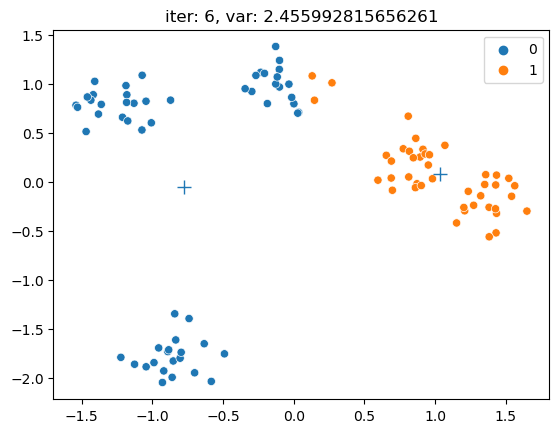

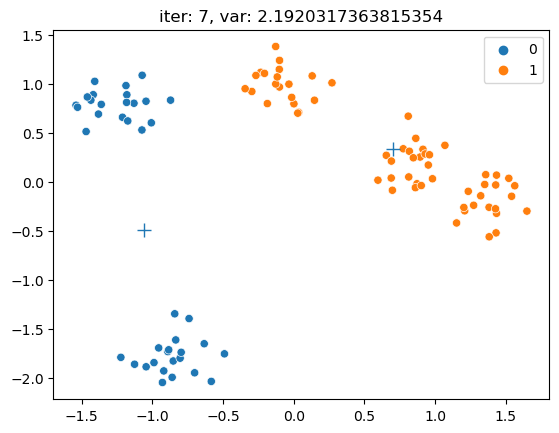

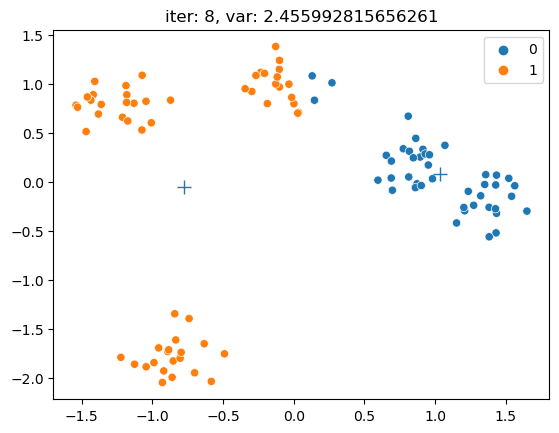

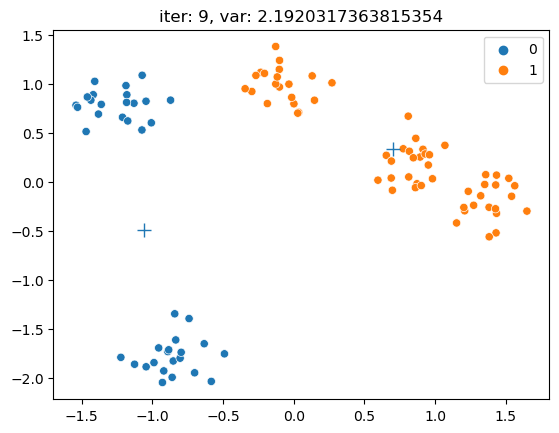

In [464]:
kmeans.best(X_train, show=True)


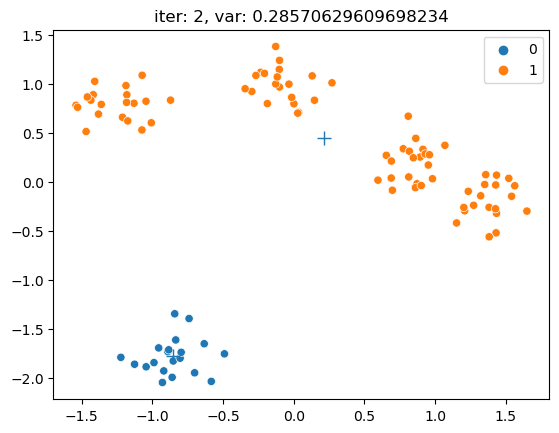

In [465]:
kmeans.centroides = kmeans.melhores_centroides
classe_centroides, classificacao = kmeans.evaluate(X_train)
sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
plt.plot([x for x, _ in kmeans.centroides], [y for _, y in kmeans.centroides], '+', markersize=10)
plt.title("iter: " + str(i) + ", var: " + str(variancias_totais[i]))
plt.show()

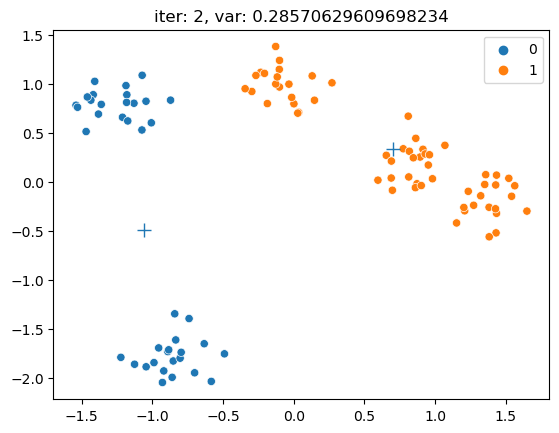

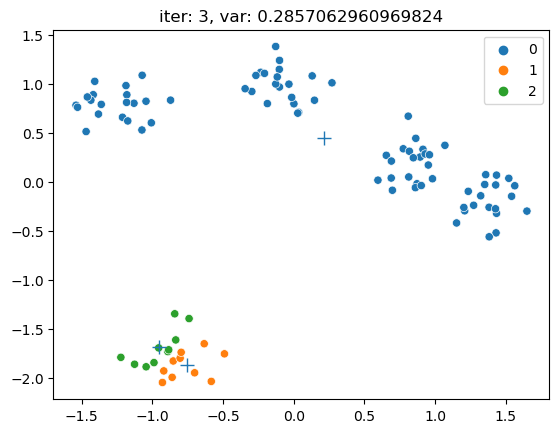

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


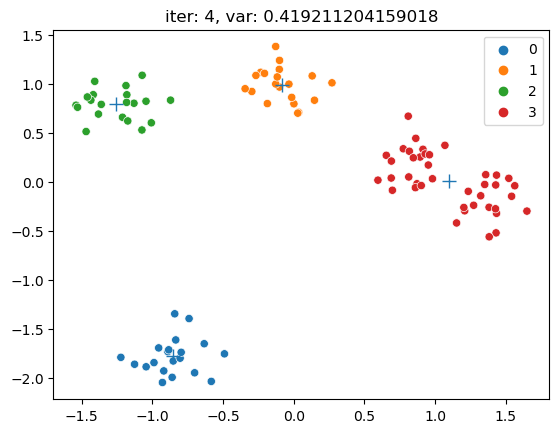

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


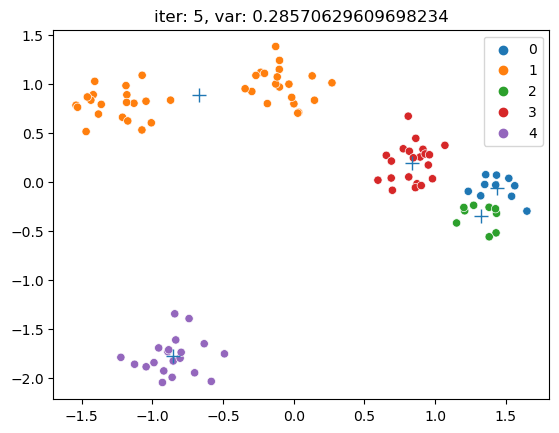

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


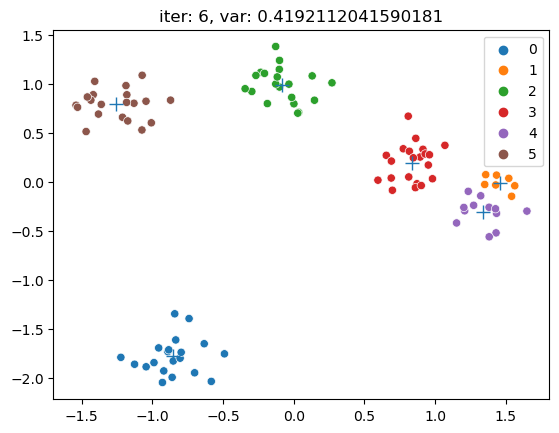

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


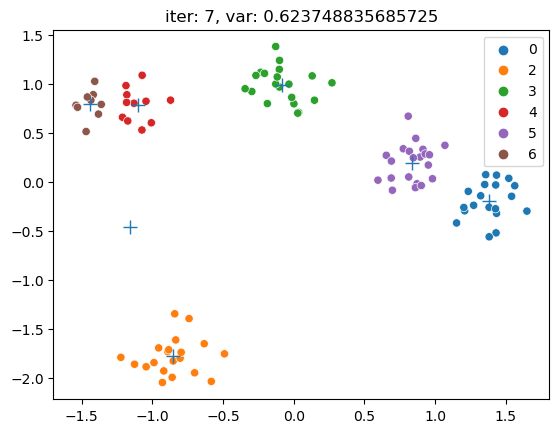

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


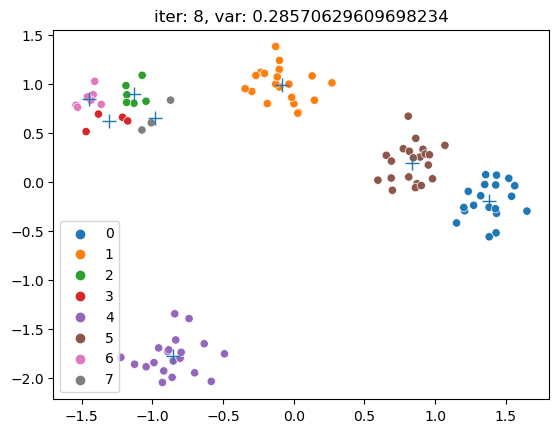

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


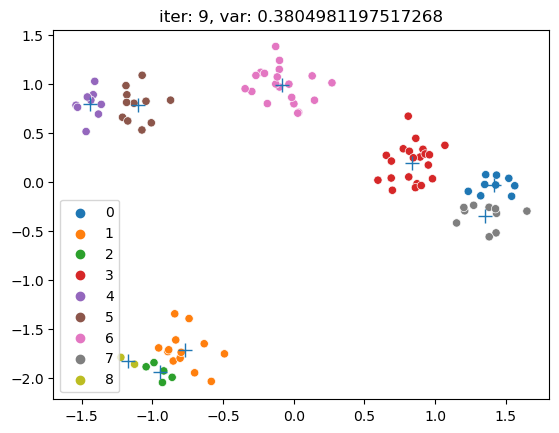

In [475]:
for i in range(2, 10):
    kmeans = KMeans(k=i)
    kmeans.best(X_train)
    kmeans.centroides = kmeans.melhores_centroides
    classe_centroides, classificacao = kmeans.evaluate(X_train)
    sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
    plt.plot([x for x, _ in kmeans.centroides], [y for _, y in kmeans.centroides], '+', markersize=10)
    plt.title("iter: " + str(i) + ", var: " + str(variancias_totais[i]))
    plt.show()